In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [2]:
df = pd.read_csv('C:/Users/rgangurde/Downloads/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
feature_X = df[['region','tenure','age','marital','address','income','ed','employ','retire','gender','reside']].values

In [4]:
feature_X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [5]:
feature_Y = df['custcat'].values

In [6]:
feature_Y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [7]:
feature_X_ = preprocessing.StandardScaler().fit(feature_X).transform(feature_X.astype(float))

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature_X_, feature_Y, test_size = 0.4, random_state = 4)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 4).fit(x_train, y_train)

In [16]:
y_hat_ = model.predict(x_test)

In [17]:
from sklearn import metrics
print("Train accuracy: ", metrics.accuracy_score(y_train, model.predict(x_train)))
print('Test accuracy: ', metrics.accuracy_score(y_test, y_hat_))

Train accuracy:  0.5433333333333333
Test accuracy:  0.335


This model is based on 4 nearest neighbors. We are not sure if using k = 4 results in the most efficient model. So we need to find the best k for our model.

In [18]:
Ks = 10
mean_acc = np.zeros((Ks-1))
mean_acc_ = np.zeros((Ks-1))


In [19]:
for i in range(1, Ks) :
    
    model = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
    y_train_hat_ = model.predict(x_train)
    y_test_hat_ = model.predict(x_test)
    
    mean_acc[i-1] = metrics.accuracy_score(y_train, y_train_hat_)
    mean_acc_[i-1] = metrics.accuracy_score(y_test, y_test_hat_ )

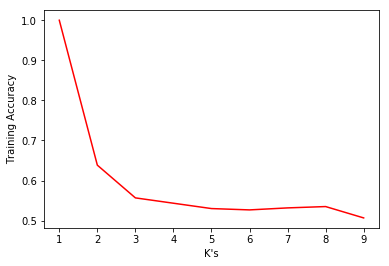

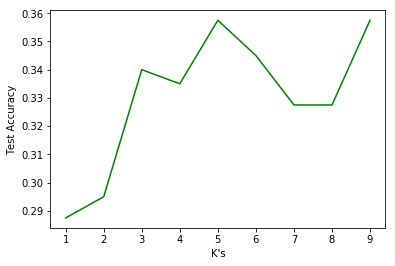

The best k for the model is 5 with accuracy of 0.3575


In [20]:
plt.plot(range(1, Ks), mean_acc, 'r')
plt.xlabel("K's")
plt.ylabel('Training Accuracy')
plt.show()

plt.plot(range(1,Ks), mean_acc_, 'g')
plt.xlabel("K's")
plt.ylabel('Test Accuracy')
plt.show()
print('The best k for the model is', mean_acc_.argmax()+1, 'with accuracy of', mean_acc_.max())